In [2]:
from keras.callbacks import History
from keras.layers import Dense
from keras.models import Sequential
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import tensorflow as tf

2024-05-20 23:48:51.023936: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-20 23:48:51.696451: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-05-20 23:48:51.696484: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-05-20 23:48:53.509665: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-

In [3]:
train_set = pd.read_csv('data/adult/adult.data', sep=", ",header = None, engine='python')
test_set = pd.read_csv('data/adult/adult.test', sep=", ",skiprows = 1, header = None, engine='python') 

In [4]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

# Zad.
Zróbmy szybki preprocesing

In [5]:
train = train_set.replace('?', np.nan).dropna()
test = test_set.replace('?', np.nan).dropna()

dataset = pd.concat([train,test])

dataset['wage_class'] = dataset.wage_class.replace({'<=50K.': 0,'<=50K':0, '>50K.':1, '>50K':1})
dataset.drop(["fnlwgt"],axis=1,inplace=True)
dataset.drop(["education"],axis=1,inplace=True)
x = dataset.groupby('native_country')["wage_class"].mean()
d = dict(pd.cut(x[x.index!=" United-States"],5,labels=range(5)))
dataset['native_country'] = dataset['native_country'].replace(d)
dataset = pd.get_dummies(dataset,drop_first=True)

In [6]:
train = dataset.iloc[:train.shape[0]]
test = dataset.iloc[train.shape[0]:]

X_train = train.drop("wage_class",axis=1)
y_train = train.wage_class

X_test = test.drop("wage_class",axis=1)
y_test = test.wage_class

# Zad
Nauczmy prosty model.

In [7]:
history = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4200      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________


2024-05-20 23:48:56.944742: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-05-20 23:48:56.945141: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2024-05-20 23:48:56.945159: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (kjUbuntu): /proc/driver/nvidia/version does not exist
2024-05-20 23:48:56.945810: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])

In [9]:
history = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100)

Epoch 1/100
943/943 [==============================] - 3s 2ms/step - loss: 0.5296 - accuracy: 0.7596 - val_loss: 0.4354 - val_accuracy: 0.7783
Epoch 2/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3987 - accuracy: 0.8052 - val_loss: 0.3788 - val_accuracy: 0.8109
Epoch 3/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3803 - accuracy: 0.8109 - val_loss: 0.3714 - val_accuracy: 0.8201
Epoch 4/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3732 - accuracy: 0.8158 - val_loss: 0.3895 - val_accuracy: 0.7995
Epoch 5/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3663 - accuracy: 0.8237 - val_loss: 0.3595 - val_accuracy: 0.8290
Epoch 6/100
943/943 [==============================] - 3s 3ms/step - loss: 0.3569 - accuracy: 0.8290 - val_loss: 0.3498 - val_accuracy: 0.8320
Epoch 7/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3538 - accuracy: 0.8260 - val_loss: 0.3773 - val_accuracy: 0.8067

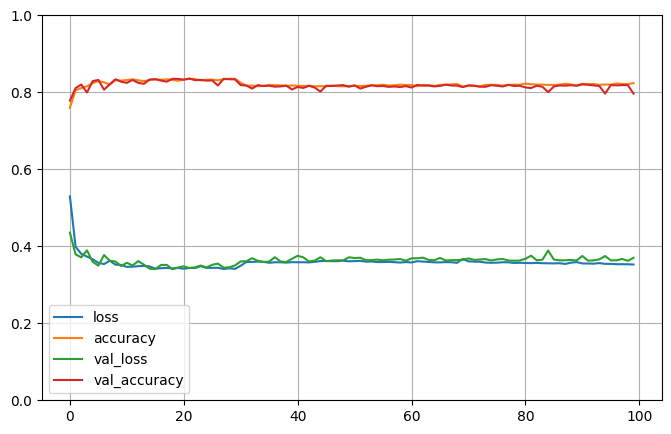

In [10]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [11]:
model.evaluate(X_test,y_test)

471/471 [==============================] - 1s 1ms/step - loss: 0.3700 - accuracy: 0.7964


[0.3699857294559479, 0.796414315700531]

In [12]:
y_pred = model.predict(X_test)

# Assuming a binary classification problem
y_pred = (y_pred > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

471/471 [==============================] - 1s 944us/step
Accuracy: 0.7964143426294821


# Zad

Porównaj powyższy wynik z nauką na danych znormalizowanych z fróżnymi funkcjami aktywacji:
* sigmoid
* tanh
* relu
* elu
* LeakyReLU

In [13]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
activation_functions = ["sigmoid", "tanh", "relu", "elu", "LeakyReLU"]

In [15]:
models_history = []

for activation in activation_functions:
    model = Sequential()
    model.add(Dense(100,activation=activation,input_shape=(X_train.shape[1],)))
    model.add(Dense(50,activation=activation))
    model.add(Dense(10,activation=activation))
    model.add(Dense(1,activation=activation))
    model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])
    history = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=30, verbose=0)
    models_history.append((history, model))
    print(f"finished {activation}")

finished sigmoid
finished tanh
finished relu
finished elu
finished LeakyReLU


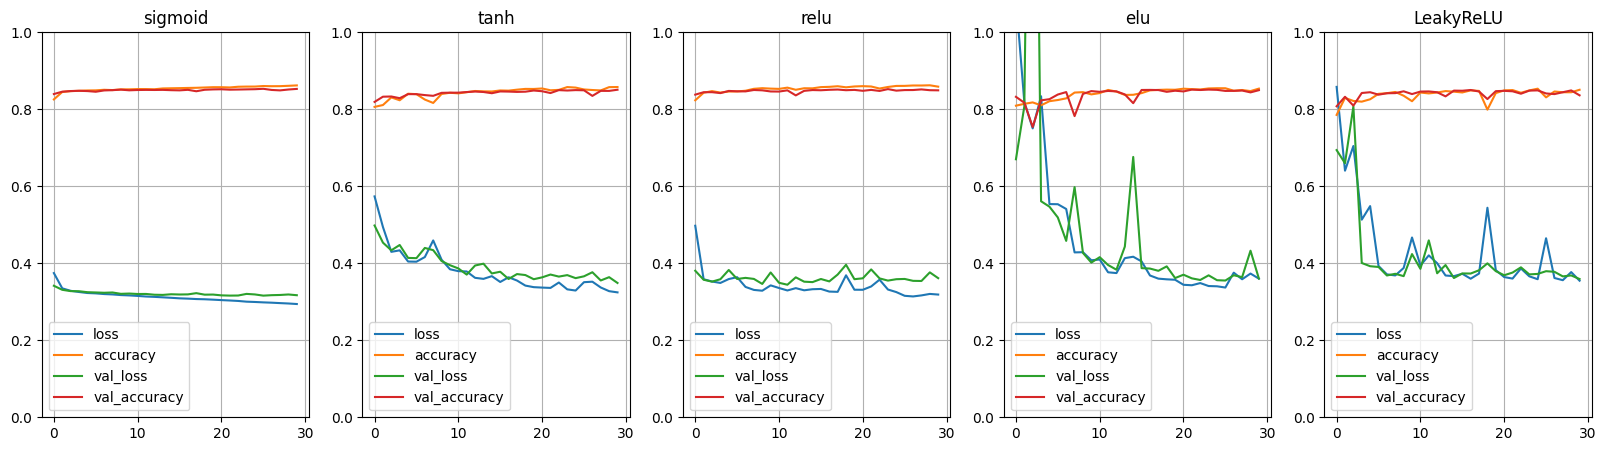

In [16]:
fig, axs = plt.subplots(1, 5, figsize=(20, 5))

for i, (history, model) in enumerate(models_history):
    pd.DataFrame(history.history).plot(ax=axs[i])
    axs[i].set_title(activation_functions[i])
    axs[i].set_ylim(0, 1)
    axs[i].grid(True)
    axs[i].legend()

In [17]:
df = pd.DataFrame(columns=["activation", "accuracy"])

for i, (history, model) in enumerate(models_history):
    y_pred = model.predict(X_test)
    y_pred = (y_pred > 0.5).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    df.loc[i] = [activation_functions[i], accuracy]

df

471/471 [==============================] - 0s 908us/step


,activation,accuracy
0,sigmoid,0.852922
1,tanh,0.850797
2,relu,0.849203
3,elu,0.849602
4,LeakyReLU,0.836255


# Zad. 
Stwórz wykres porównujący metody. 

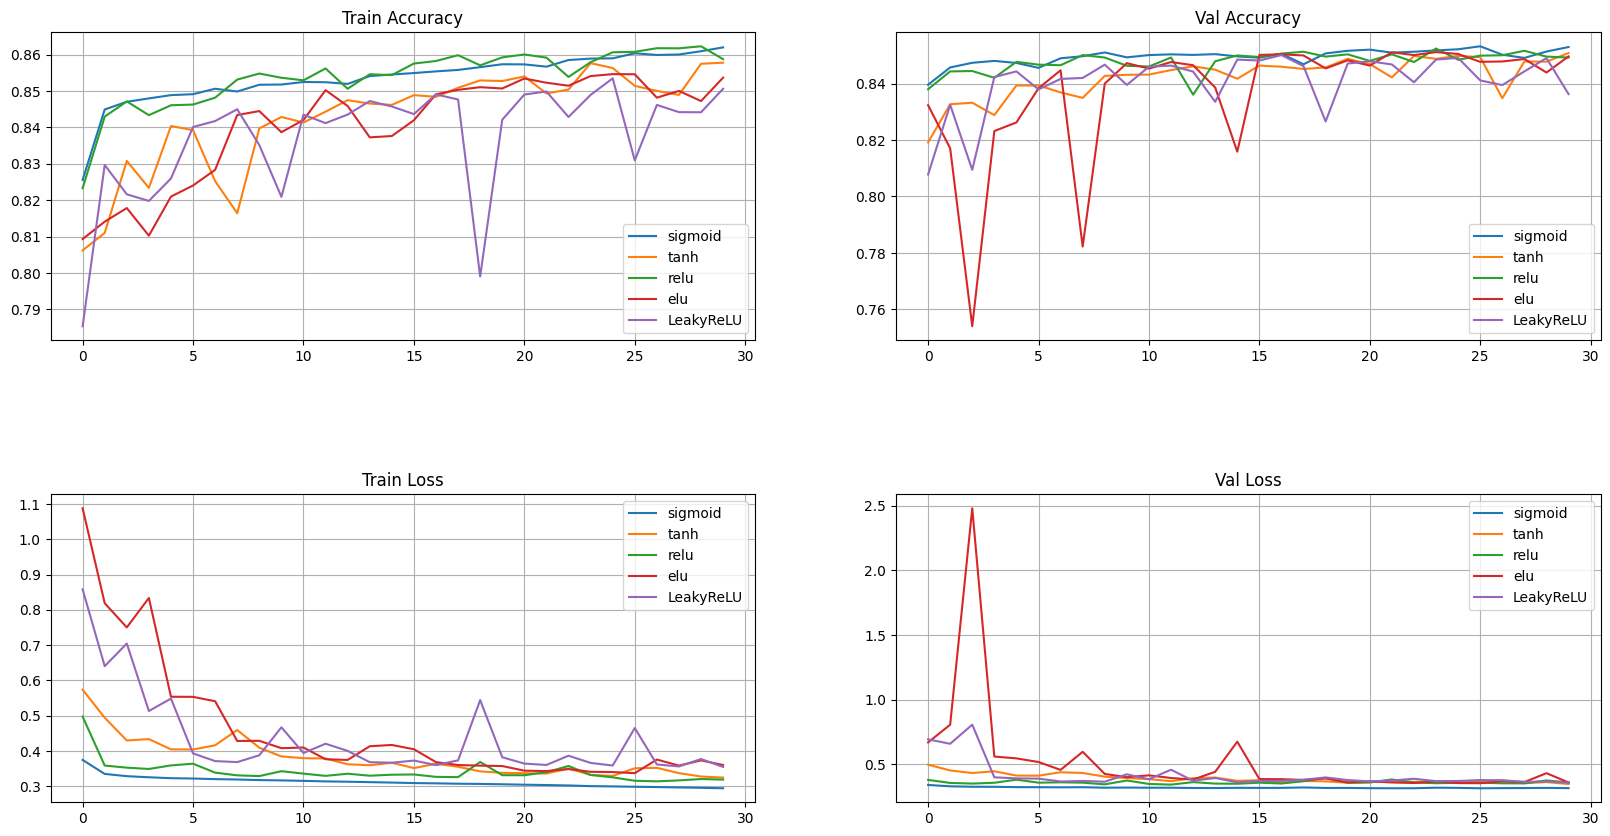

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))

for i, (history, _) in enumerate(models_history):
    axs[0][0].plot(history.history['accuracy'], label=f'{activation_functions[i]}')
    axs[0][1].plot(history.history['val_accuracy'], label=f'{activation_functions[i]}')
    axs[1][0].plot(history.history['loss'], label=f'{activation_functions[i]}')
    axs[1][1].plot(history.history['val_loss'], label=f'{activation_functions[i]}')

axs[0][0].set_title('Train Accuracy')
axs[0][1].set_title('Val Accuracy')
axs[1][0].set_title('Train Loss')
axs[1][1].set_title('Val Loss')

for ax in axs.flatten():
    ax.legend()
    ax.grid(True)

plt.subplots_adjust(hspace=0.5)
plt.show()